# Neural Networks for Self-tuning Control Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoide (v):
 '''función logística'''
 return (1./(1.+np.exp(-v)))


### Self tuning neural controler structure

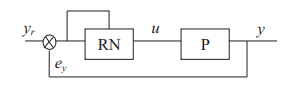   

yr = input_sys

u = out_ann

y = out_sys

ey = sys_error

 

In [3]:
k=2.534 # ganancia del sistema
tao=62.19 # Tao del sistema
delta=30 # Tiempo de muestreo en la toma de datos
input_sys =1 # Entrada del sistema
out_sys = np.array([0])
out_sys_la = np.array([0])
out_sys_lc = np.array([0])
sys_error =np.array([0,0])
spp=[] 

### Neural net controller structure

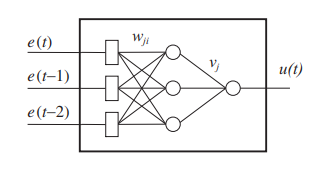

e(t),e(t-1),e(t-2) = error_in_leayer 

wji = weight_wj  

vj = weight_vj

u(t) = out_ann

In [4]:
weight_wj = np.array([[-0.0464583, -0.0459836, -0.0472436],
 [-0.0464583, -0.0459836, -0.0472436],
 [-0.0464583, -0.0459836, -0.0472436]])
weight_vj = np.array([[-0.935434, -0.935434, -0.935434]])

In [11]:
out_ann=np.array([0]) # Inicializo la salida de la RNA en 1
# learning rate
n_etha=0.4 
alpha=0.01
epocas = 1000


delta_1 = 

delta_2 = 

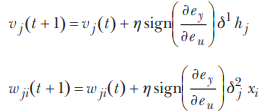

n_etha = 

In [12]:
#Lazo Abierto
for t in range (epocas):
    
    out_sys_la = np.append(out_sys_la,(((input_sys*k)-out_sys_la[-1])*delta)/(tao) + out_sys_la[-1]) # Ecuacion en diferencias de orden uno
    #Lazo cerrado sin control
    elc = input_sys - out_sys_lc[-1]
    out_sys_lc = np.append(out_sys_lc,(((elc*k)-out_sys_lc[-1])*delta)/(tao) + out_sys_lc[-1])


    #Lazo cerrado con control
    if t > 200:
        yr=0.8
    if t > 400:
        yr=0.4
    if t > 600:
        yr=0.0
    if t > 800:
        yr=0.8
    # Error del sistema
    sys_error = np.append(sys_error,input_sys-out_sys[-1]) 
    # Arreglo de Errores atrasados
    error_in_leayer = np.array([sys_error[-1],sys_error[-2],sys_error[-3]]) 
    
    # Producto punto entre entradas y pesos W_1
    aux = np.dot(weight_wj,error_in_leayer) 
    
    # Evaluación con la funcion sigmoide
    aux_2 = np.reshape(sigmoide(aux),(1,3)) 
    aux_4 = sigmoide(np.dot(aux_2,np.reshape(weight_vj,(3,1))))
    out_ann = np.append(out_ann,aux_4)
    
    # Generacion de delta 1
    delta_1 = sys_error[-1]*out_ann[-1]*(1-out_ann[-1]) 
    
    # Generacion de delta 2
    delta_2 = delta_1*weight_vj*aux_2*(1-aux_2) 
    
    aux_3 = alpha*np.abs(sys_error[-1])
    
    # Generacion del etha variable
    n_etha = n_etha + aux_3 
    
    # Ecuacion en diferencias de orden uno
    out_sys = np.append(out_sys,(((out_ann[-1]*k)-out_sys[-1])*delta)/(tao) + out_sys[-1]) 
    
    # Actualizacion de pesos de V_j
    weight_vj = weight_vj + ( n_etha * delta_1 * aux_2) 
    # Actualizacion de pesos de W_ji
    weight_wj = weight_wj+(n_etha*delta_2*(error_in_leayer)) 
    spp.append(input_sys)


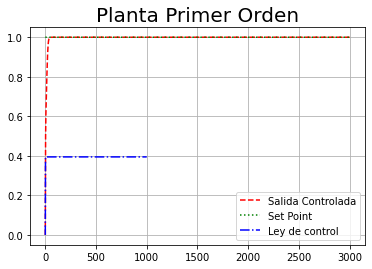

In [13]:
plt.plot(out_sys,c='red',label='Salida Controlada',linestyle='--')
plt.plot(spp,c='green',label='Set Point',linestyle=':')
# plt.plot(yla,c='blue',label='Orden_1 LA',linestyle='--')
# plt.plot(ylc,c='green',label='Orden_1 LC',linestyle='--')
plt.plot(out_ann,c='blue',label='Ley de control',linestyle='-.')
plt.title('Planta Primer Orden',c='black',size=20)
plt.legend()
plt.grid()

# References
[Ponce, A. N., Behar, A. A., Hernández, A. O., & Sitar, V. R. (2004). Neural networks for self-tuning control systems. Acta Polytechnica, 44(1).](https://ojs.cvut.cz/ojs/index.php/ap/article/view/514/346)

[Fuentes-Silva, C., et al. "Control neuronal auto-ajustable en tiempo real de un proceso de producción de fibra óptica polimérica." Ingeniería, investigación y tecnología 13.2 (2012): 175-184.](http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1405-77432012000200005)